# Car accidents and the weather

First, Folium is installed in order to produce maps

In [4]:
pip install folium

Import all necessary libraries

In [1]:
import folium
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Produce a map of Seatle, Washington

In [2]:
map=map_seat= folium.Map(location=[47.6080, -122.3351], zoom_start=11,tiles='Stamen Terrain')
map

Now, we load the data about car accidents in Seatle to a dataframe called df_accidents

In [4]:
df_accidents=pd.read_csv('Data-Collisions.csv',low_memory=False, parse_dates=['INCDATE','INCDTTM'] )
df_accidents.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


The dataframe contains 38 columns, not all of them will be used for the analysis so, a new dataframe called df_usefull is produced with the variables neeeded for this study.

In [5]:
#Here we create a dataframe witht the needed variables ony
df_usefull=df_accidents[['SEVERITYCODE','Y', 'X','ADDRTYPE','SEVERITYDESC','COLLISIONTYPE','INCDATE','SDOT_COLCODE','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND']]

Graph of the percentage of accidents with severitycode=2 aat different weather conditions. 

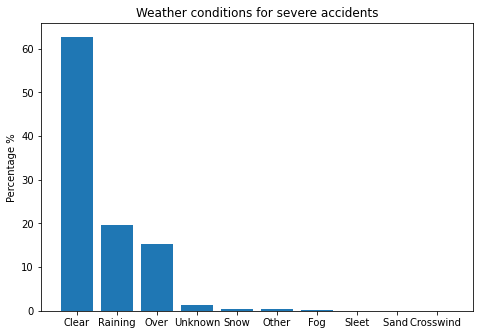

In [6]:
p=df_usefull.groupby(['SEVERITYCODE'])['WEATHER'].value_counts(normalize=True)
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
x1=['Clear','Raining','Over','Unknown','Snow','Other','Fog','Sleet','Sand ','Crosswind ']
y1=p.values[11:21]*100#[63,23,10,0.7,0.6,0.06,0.06,0.03,0.03]
ax.bar(x1,y1)
ax.set_ylabel('Percentage %')
ax.set_title('Weather conditions for severe accidents')
plt.show()


Most accidents happened with clear weather. The top three weather conditions were Clear, Raining and Overcast
Now, let's see the road conditions when the accidents happened.

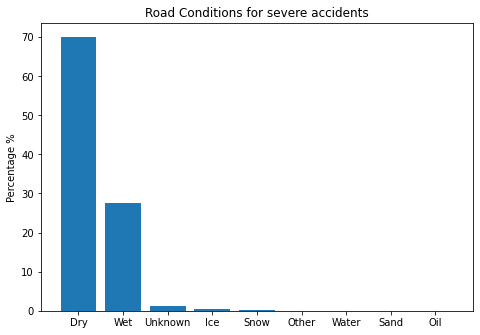

In [7]:
p1=df_usefull.groupby(['SEVERITYCODE'])['ROADCOND'].value_counts(normalize=True)
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
x2=['Dry','Wet','Unknown','Ice','Snow','Other','Water','Sand','Oil']
y2=p1.values[9:18]*100#[63,23,10,0.7,0.6,0.06,0.06,0.03,0.03]
ax.bar(x2,y2)
ax.set_ylabel('Percentage %')
ax.set_title('Road Conditions for severe accidents')
plt.show()

Most accidents happened when the road was dry, Top 3 road conditions causing severe accidents: Dry, Wet and Ice
Now let's look into the human factors of inattention and driving under the influence of substances

In [8]:
df_usefull.groupby(['INATTENTIONIND'])['SEVERITYCODE'].value_counts(normalize=True)

INATTENTIONIND  SEVERITYCODE
Y               1               0.651166
                2               0.348834
Name: SEVERITYCODE, dtype: float64

65% of accidents caused because of driver's inattention were not severe (SEVERITYCODE==1) while only 35% were severe. Now let's look at under the influence

In [9]:
df_usefull.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts(normalize=True)

UNDERINFL  SEVERITYCODE
0          1               0.717628
           2               0.282372
1          1               0.593742
           2               0.406258
N          1               0.691884
           2               0.308116
Y          1               0.621732
           2               0.378268
Name: SEVERITYCODE, dtype: float64

37% of accidents where the driver was under the influence of substances, had severity code 2
Let's explore more relations between the variables:

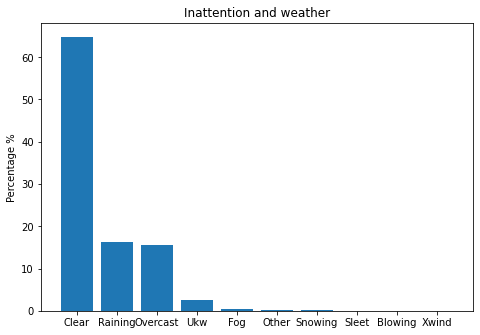

In [10]:
p2=df_usefull.groupby(['INATTENTIONIND'])['WEATHER'].value_counts(normalize=True)
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
x3=['Clear','Raining','Overcast','Ukw','Fog','Other','Snowing','Sleet','Blowing','Xwind']
y3=p2.values*100
ax.bar(x3,y3)
ax.set_ylabel('Percentage %')
ax.set_title('Inattention and weather')
plt.show()

More than 60% of accidents due to driver inattention happened with clear weather. The top three weather conditions when accidents due to driver inattention happened were Clear, Raining and Overcast. 


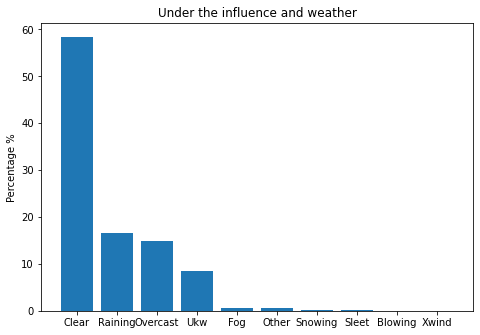

In [11]:
#df_usefull['UNDERINFL'].fillna(0,inplace=True)
#df_usefull['UNDERINFL'].replace(to_replace=['Y','N','0'], value=[1,2,2], inplace=True)
#df_usefull['UNDERINFL']=df_usefull['UNDERINFL'].astype(int)
p3=df_usefull.groupby(['UNDERINFL'])['WEATHER'].value_counts(normalize=True)
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
x4=['Clear','Raining','Overcast','Ukw','Fog','Other','Snowing','Sleet','Blowing','Xwind']
y4=p3.values[0:10]*100
ax.bar(x4,y4)
ax.set_ylabel('Percentage %')
ax.set_title('Under the influence and weather')
plt.show()


In [12]:
#just to see how the dataframes were reduced, first print the columns of df_accidents and then the columns of df_useful
print('full dataframe', df_accidents.columns)
print('Reduced dataframe',df_usefull.columns)

full dataframe Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')
Reduced dataframe Index(['SEVERITYCODE', 'Y', 'X', 'ADDRTYPE', 'SEVERITYDESC', 'COLLISIONTYPE',
       'INCDATE', 'SDOT_COLCODE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND'],
      dtype='object')


All categorical values are converted to numerical values.


In [14]:
df_usefull['LIGHTCOND'].replace(to_replace=['Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On',
                                                'Dark - Unknown Lighting', 'Dawn','Daylight','Dusk','Other','Unknown'], value=[1,2,3,4,5,6,7,0,0], inplace=True)
df_usefull['LIGHTCOND'].fillna(0,inplace=True)
df_usefull['LIGHTCOND']=df_usefull['LIGHTCOND'].astype(int)
df_usefull['ROADCOND'].replace(to_replace=['Dry','Ice','Oil','Other','Sand/Mud/Dirt','Snow/Slush','Standing Water','Unknown','Wet'], value=[1,2,3,0,4,5,6,0,7],inplace=True)
df_usefull['ROADCOND'].fillna(0,inplace=True)
df_usefull['ROADCOND']=df_usefull['ROADCOND'].astype(int)
df_usefull['WEATHER'].replace(to_replace=['Blowing Sand/Dirt','Clear','Fog/Smog/Smoke','Other','Overcast','Partly Cloudy','Raining','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing','Unknown'], value=[1,2,3,0,4,5,6,7,8,9,0],inplace=True)
df_usefull['WEATHER'].fillna(0,inplace=True)
df_usefull['WEATHER']=df_usefull['WEATHER'].astype(int)
df_usefull['UNDERINFL'].replace(to_replace=['Y','N','0'], value=[1,2,2], inplace=True)
df_usefull['UNDERINFL'].fillna(0,inplace=True)
df_usefull['UNDERINFL']=df_usefull['UNDERINFL'].astype(int)
df_usefull['INATTENTIONIND'].replace(to_replace=['Y','N'], value=[1,0], inplace=True)
df_usefull['INATTENTIONIND'].fillna(0, inplace=True)
df_usefull['INATTENTIONIND']=df_usefull['INATTENTIONIND'].astype(int)
df_usefull.dtypes

C:\Users\joma_\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\joma_\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-14-d9fc16a3c82a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_

SEVERITYCODE                    int64
Y                             float64
X                             float64
ADDRTYPE                       object
SEVERITYDESC                   object
COLLISIONTYPE                  object
INCDATE           datetime64[ns, UTC]
SDOT_COLCODE                    int64
INATTENTIONIND                  int32
UNDERINFL                       int32
WEATHER                         int32
ROADCOND                        int32
LIGHTCOND                       int32
dtype: object

We investigate the relation between inattention and the weather

In [16]:
df_usefull.groupby(['INATTENTIONIND'])['WEATHER'].value_counts(normalize=True)

INATTENTIONIND  WEATHER
0               2          0.556918
                6          0.171713
                4          0.140167
                0          0.122110
                9          0.005168
                3          0.002820
                8          0.000637
                1          0.000309
                7          0.000127
                5          0.000030
1               2          0.648113
                6          0.162221
                4          0.154504
                0          0.029257
                3          0.003489
                9          0.001845
                8          0.000268
                1          0.000168
                7          0.000134
Name: WEATHER, dtype: float64

we investigate the realation between underinfl and weather



In [17]:
df_usefull.groupby(['UNDERINFL'])['WEATHER'].value_counts(normalize=True)

UNDERINFL  WEATHER
0          0          1.000000
1          2          0.634031
           6          0.197785
           4          0.151299
           0          0.007236
           3          0.005043
           9          0.003837
           8          0.000439
           7          0.000219
           1          0.000110
2          2          0.583125
           6          0.173473
           4          0.145759
           0          0.088859
           9          0.004827
           3          0.002895
           8          0.000603
           1          0.000304
           7          0.000127
           5          0.000028
Name: WEATHER, dtype: float64

In [18]:
df_usefull.groupby(['LIGHTCOND'])['WEATHER'].value_counts(normalize=True)

LIGHTCOND  WEATHER
0          0          0.852474
           2          0.094978
           6          0.023943
           4          0.023308
           9          0.004185
                        ...   
7          9          0.003728
           3          0.001017
           1          0.000339
           8          0.000339
           7          0.000169
Name: WEATHER, Length: 68, dtype: float64

In [19]:
df_usefull.groupby(['ROADCOND'])['WEATHER'].value_counts(normalize=True)

ROADCOND  WEATHER
0         0          0.947433
          2          0.029374
          4          0.019434
          6          0.002522
          3          0.000445
          9          0.000445
          1          0.000198
          8          0.000148
1         2          0.852510
          4          0.129957
          0          0.008899
          6          0.005148
          3          0.002875
          1          0.000257
          9          0.000193
          7          0.000080
          8          0.000048
          5          0.000032
2         2          0.531017
          4          0.186104
          9          0.139785
          0          0.079404
          3          0.028950
          8          0.014888
          6          0.011580
          1          0.005790
          7          0.002481
3         6          0.515625
          2          0.296875
          4          0.125000
          0          0.062500
4         2          0.440000
          4          0

Feature Selection

In [20]:
##Feature selection and we drop weather=Unknown
Feature=df_usefull[['INATTENTIONIND','UNDERINFL','LIGHTCOND','ROADCOND']]
Feature=pd.concat([Feature,pd.get_dummies(df_usefull['WEATHER'])], axis=1)
Feature.drop([0], axis=1, inplace=True)

In [21]:
X=Feature
y=df_usefull['SEVERITYCODE'].values

Data Normalization

In [22]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

X = preprocessing.StandardScaler().fit(X).transform(X)

Classification: we split the X into train and test to find the best K for K-means

In [25]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=4)
print('Train set:',X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (155738, 13) (155738,)
Test set: (38935, 13) (38935,)


Modeling

In [26]:
k=3
kNN_model=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=3)

In [27]:
yhat= kNN_model.predict(X_test)
yhat[0:5]

array([1, 2, 2, 2, 1], dtype=int64)

Best K calculation:

In [28]:
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.61289328, 0.65028894, 0.60675485, 0.6567099 , 0.63020419,
       0.69646847, 0.69590343, 0.69736741, 0.69140876, 0.70021831,
       0.58631052, 0.69731604, 0.69554386, 0.70057789])

I've chosen k=6

In [39]:
k = 7
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
knn_yhat = kNN_model.predict(X_test)
 

Decision Tree

In [33]:
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
DT_model.fit(X_train,y_train)
dt_yhat = DT_model.predict(X_test)

In [34]:
dt_yhat[0:15]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Support Vector Machine

In [35]:
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 
svm_yhat = SVM_model.predict(X_test)

In [37]:
svm_yhat[0:15]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Testing all models

In [42]:
from sklearn import preprocessing
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


print("KNN Jaccard index: %.2f" % jaccard_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

print("DT Jaccard index: %.2f" % jaccard_score(y_test,dt_yhat))
print("DT F1-score: %.2f" % f1_score(y_test, dt_yhat, average='weighted') )

print("SVM Jaccard index: %.2f" % jaccard_score(y_test,svm_yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, svm_yhat, average='weighted') )


KNN Jaccard index: 0.69
KNN F1-score: 0.60
DT Jaccard index: 0.70
DT F1-score: 0.58
SVM Jaccard index: 0.70
SVM F1-score: 0.58
